In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

##### https://keras.io/api/datasets/cifar10



In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test /255

In [ ]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train.shape, y_test.shape

((50000,), (10000,))

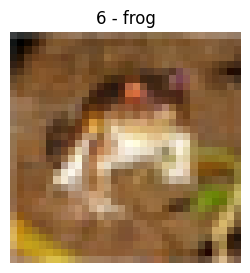

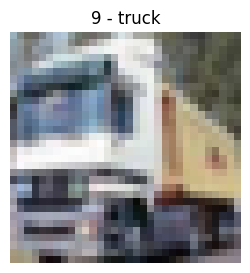

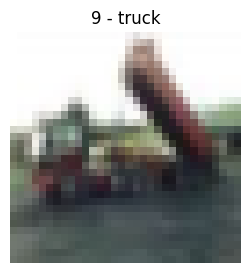

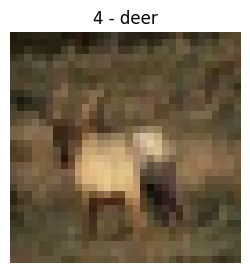

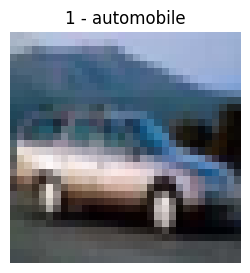

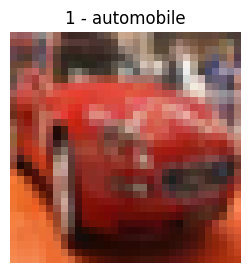

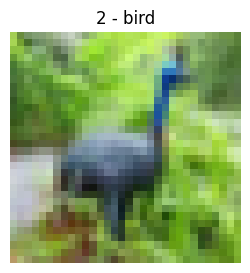

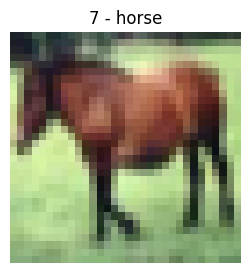

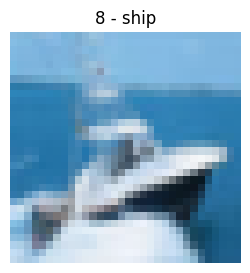

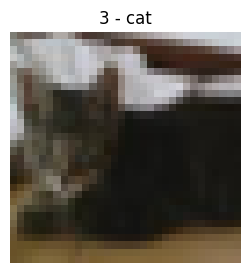

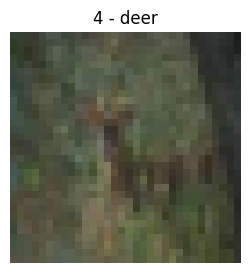

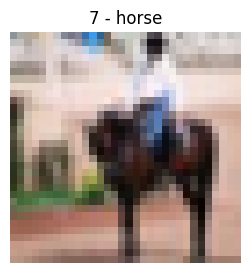

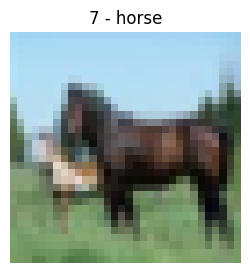

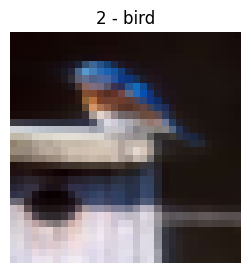

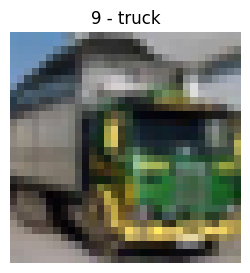

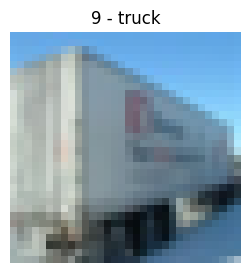

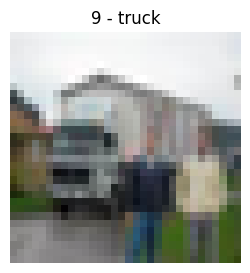

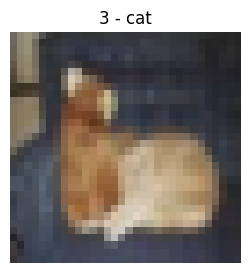

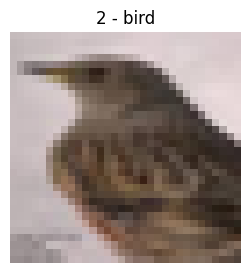

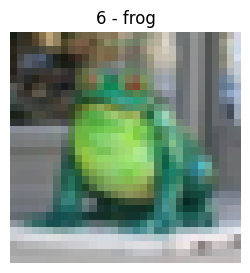

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(20):
    plt.figure(figsize=(3,3))
    plt.title(f'{y_train[i]} - {classes[y_train[i]]}')
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.show()

##### CNN: https://www.youtube.com/watch?v=zfiSAzpy9NM&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=23

In [ ]:
# Filter is like a Feature Detector
# After applying the filter in an image, it creates a Feature Map with a decreased shape (when padding = 'valid')

# The Feature Map + Max Pooling helps with an invariant feature in different locations of an image

# The feature map then goes through an activation function to introduce non-linearity and speed up computations

# Max pooling helps with reducing the shape of an image for computations

In [ ]:
model = keras.Sequential([
    # CNN for feature extraction
    keras.layers.Input(shape=(32, 32, 3)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    # NN for classification
    keras.layers.Flatten(),
    keras.layers.Dropout(0.05),
    keras.layers.Dense(96,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(48,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation='softmax')
])


model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4400 - accuracy: 0.8445
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4299 - accuracy: 0.8475
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4198 - accuracy: 0.8517
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4079 - accuracy: 0.8565
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4016 - accuracy: 0.8584
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3834 - accuracy: 0.8663
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3842 - accuracy: 0.8635
Epoch 8/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3703 - accuracy: 0.8695
Epoch 9/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3667 - accuracy: 0.8711
Epoch 10/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3

In [ ]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9721 - accuracy: 0.7188


[0.972113847732544, 0.7188000082969666]

In [ ]:
probability = model.predict(X_test_scaled)
probability.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [ ]:
yp_test = np.array([np.argmax(i) for i in probability])
yp_test

array([3, 8, 1, ..., 5, 0, 7])

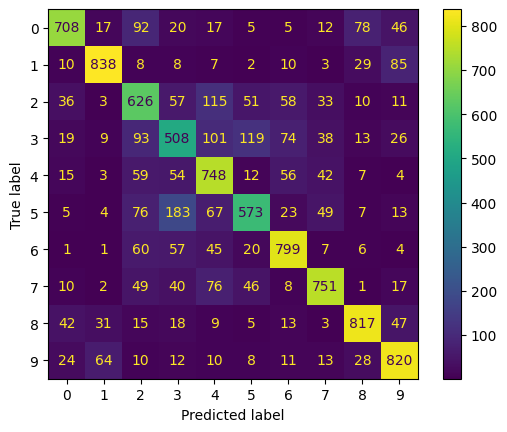

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, yp_test)
display_cm = ConfusionMatrixDisplay(cm, display_labels=None)
display_cm.plot()